In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


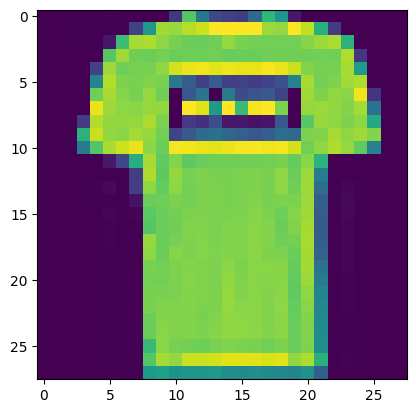

In [5]:
plt.imshow(x_train[1])

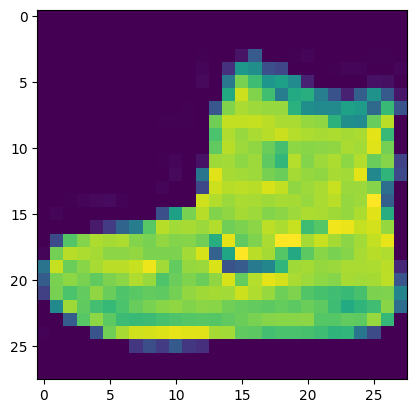

In [6]:
plt.imshow(x_train[0])

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
y_train.shape

(60000,)

In [14]:
y_test.shape

(10000,)

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.9542 - accuracy: 0.6450 - val_loss: 88.3100 - val_accuracy: 0.3742
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.6781 - accuracy: 0.7431 - val_loss: 33.7636 - val_accuracy: 0.5503
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.6027 - accuracy: 0.7715 - val_loss: 195.4177 - val_accuracy: 0.2516
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.5542 - accuracy: 0.7885 - val_loss: 196.1379 - val_accuracy: 0.2537
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.5207 - accuracy: 0.8027 - val_loss: 141.2190 - val_accuracy: 0.3160
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4972 - accuracy: 0.8143 - val_loss: 63.7247 - val_accuracy: 0.4916
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4790 - accuracy: 0.8195 - val_loss:

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 66.9494 - accuracy: 0.5401


In [19]:
print("Test accuracy:", test_acc)

Test accuracy: 0.5400999784469604
